# Title: Credit Card Fraud Detection

# Introduction

As an online transaction increase, the possibility of fraud cases in credit card financial transaction increased. The study of Noghani and Moattar (2017) document that a total sum of $3.5billon was lost in 2012 to online fraud related cases. The global fraud detection and prevention market stated that the amount of $11.67 billion was lost in 2017 and is expected to reach $29.07 billion by 2023 (Research and Market,2018). The consequent is that it is not only the clients that suffer but both financial institution and client are also affected.

In this project, I compared the performance of different classification algorithm with their optimal tuning model for fraud detection. The supervised algorithm models estimated in this project include Logistic Regression, XGboost, Kneighbours, Gaussian Naive Bayesian, Decision Tree and Random Forest as well as the combined voting model.

The result indicates that logistic regression and combined voting model perform better than other alternative models. The accuracy measured under the ROC curve area for logistic regression and combined voting method shows 98% and 97% respectively accurate when compared with other selected model. 

# Contents

# 1.Libraries importation

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier



C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
dataset = pd.read_csv(r'C:\Users\Ajay\Desktop\NoteMachine\creditcard.csv')



# 2.Data Exploration

In [10]:
# visualisation of the top of the dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# bottom 10 records
dataset.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
dataset.shape

(284807, 31)

In [14]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# to check for the missing value 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
# No missing value and  objects. Therefore, our data appears to be clean.

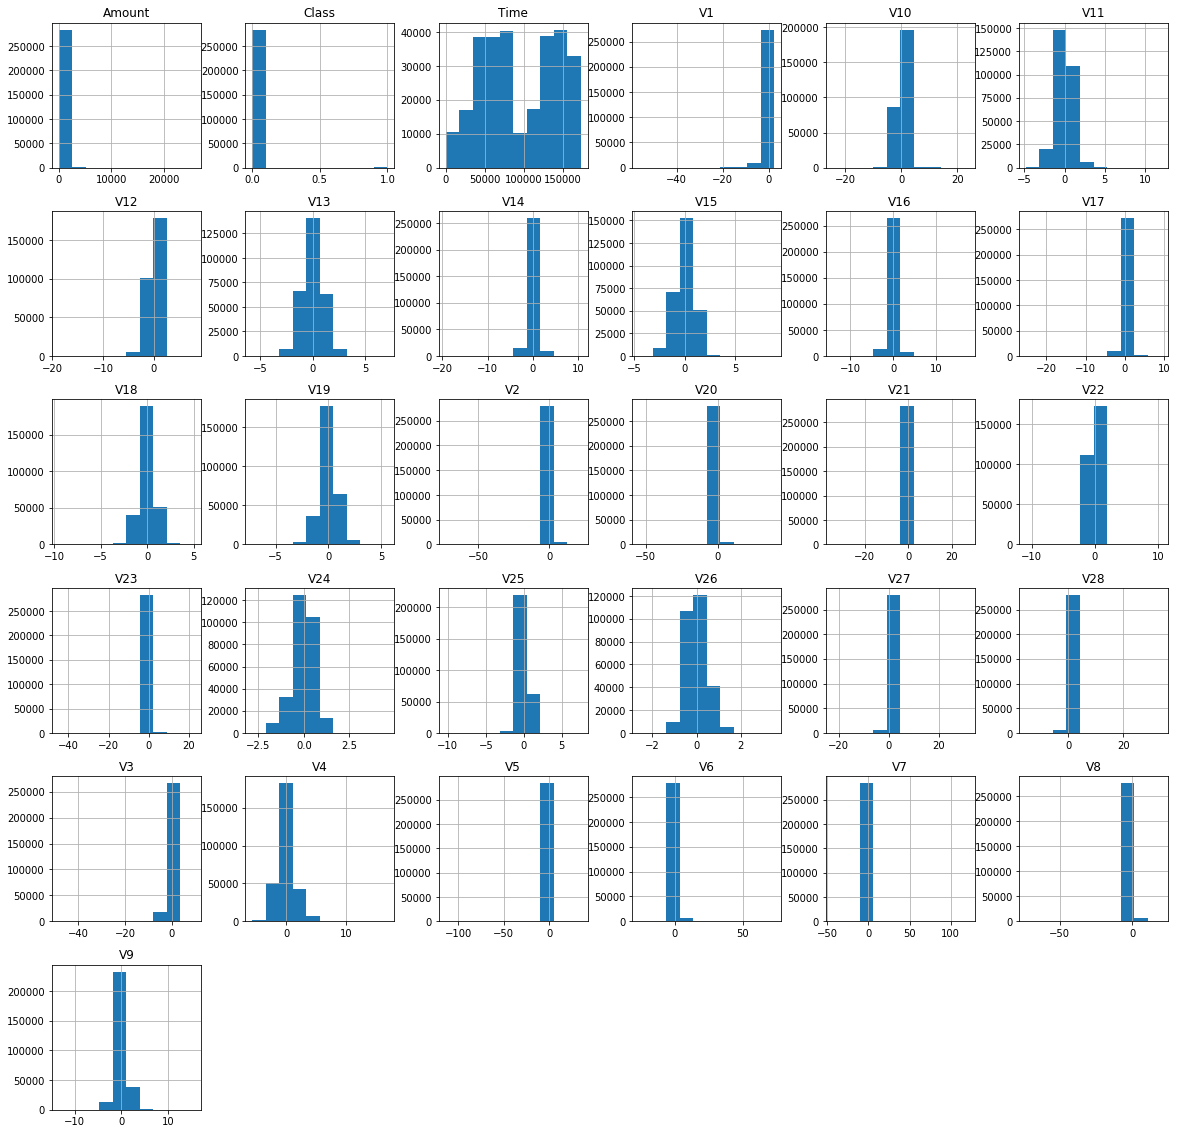

In [20]:
dataset.hist(figsize = (20, 20))
plt.show()

In [15]:

# Determine number of fraud cases in dataset

Fraud = dataset[dataset['Class'] == 1]
Valid = dataset[dataset['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(dataset[dataset['Class'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [23]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777386e-12,-2.119585e-12,-1.724017e-13,-3.472870e-12,-1.306592e-13,-1.127393e-13,2.115132e-12,3.081639e-14,-2.615209e-12,1.866050e-12,-1.238751e-12,7.587057e-13,-1.870823e-13,-3.599620e-13,-1.142579e-12,1.671929e-12,-5.736991e-13,-2.770313e-12,2.660170e-13,-3.276409e-12,2.281843e-12,-2.971523e-12,-1.029987e-12,1.146728e-12,1.835367e-12,7.624885e-12,-9.774773e-13,-0.227709,-0.101347
V2,-0.010593,3.777386e-12,1.000000e+00,2.326821e-12,-2.314711e-12,-1.832637e-12,9.439633e-13,5.403061e-12,2.153414e-14,3.239499e-13,1.463139e-12,-8.312889e-13,6.139500e-13,-1.180868e-12,-3.385766e-13,2.200546e-13,-8.001072e-13,2.028338e-12,-1.911768e-14,-2.238263e-13,5.842566e-13,2.280624e-12,-2.545709e-13,-4.855967e-12,6.430858e-13,-9.427890e-13,-4.128661e-13,-9.857578e-13,2.525320e-12,-0.531409,0.091289
V3,-0.419618,-2.119585e-12,2.326821e-12,1.000000e+00,2.036710e-13,-4.031527e-12,-1.582965e-13,3.404521e-12,-1.271766e-12,-6.819934e-13,-1.611234e-12,8.717778e-13,-2.729282e-12,-1.021796e-12,-5.568839e-13,6.438765e-13,-8.741567e-13,-1.060595e-12,-8.846121e-13,-1.060920e-12,1.874043e-12,6.735960e-13,-8.922035e-13,4.146836e-12,3.408174e-12,5.718362e-13,-2.576520e-12,-5.041949e-12,5.188994e-12,-0.210880,-0.192961
V4,-0.105260,-1.724017e-13,-2.314711e-12,2.036710e-13,1.000000e+00,-2.549916e-13,1.083580e-12,8.130086e-13,7.338233e-13,-7.138427e-13,-1.938801e-12,1.875265e-12,5.384794e-13,6.814508e-13,-1.403949e-12,1.526633e-12,3.078666e-13,1.137838e-14,-1.309646e-12,-9.753449e-13,-2.347341e-12,-2.696261e-12,4.343923e-13,-4.161184e-12,-2.368673e-12,1.619552e-12,-3.045481e-13,-1.455904e-12,-2.832333e-12,0.098732,0.133447
V5,0.173072,-3.472870e-12,-1.832637e-12,-4.031527e-12,-2.549916e-13,1.000000e+00,-6.988066e-14,1.573950e-11,-2.038440e-12,-1.000460e-12,-7.186375e-13,-5.926530e-13,1.813042e-12,-7.039187e-14,-1.127566e-13,-1.594240e-12,-1.525969e-14,1.713973e-13,1.101935e-12,5.958309e-13,-1.738986e-13,-1.752003e-12,7.097727e-13,3.616455e-12,-2.808758e-13,1.452161e-12,-1.895655e-13,-2.124508e-12,1.010195e-11,-0.386356,-0.094974
V6,-0.063016,-1.306592e-13,9.439633e-13,-1.582965e-13,1.083580e-12,-6.988066e-14,1.000000e+00,-2.798863e-12,-5.446449e-13,2.036992e-12,7.430422e-13,1.014977e-12,-9.266614e-13,1.484988e-12,-1.213461e-12,-1.054852e-12,1.374520e-12,7.433013e-13,6.851723e-13,1.149008e-12,-2.382082e-12,1.476734e-12,-1.145022e-12,-1.527599e-12,1.552011e-12,-2.723515e-12,3.351155e-12,1.480833e-12,-6.072099e-13,0.215981,-0.043643
V7,0.084714,-1.127393e-13,5.403061e-12,3.404521e-12,8.130086e-13,1.573950e-11,-2.798863e-12,1.000000e+00,5.528624e-12,5.086017e-13,1.676653e-12,-8.527538e-13,-2.827657e-13,-8.174171e-13,2.038027e-12,1.075264e-12,-1.477157e-12,-1.232709e-12,-4.281009e-13,-3.742530e-12,8.068636e-12,2.787549e-12,-8.133708e-13,-4.292216e-12,-2.553519e-12,-7.410166e-13,-4.475969e-12,-1.328689e-11,2.955517e-13,0.397311,-0.187257
V8,-0.036949,2.115132e-12,2.153414e-14,-1.271766e-12,7.338233e-13,-2.038440e-12,-5.446449e-13,5.528624e-12,1.000000e+00,-2.243351e-12,-1.660435e-12,1.296749e-12,-3.851332e-13,7.721702e-13,-2.596096e-12,1.649018e-12,-1.830232e-12,7.023506e-13,1.499457e-12,1.988264e-12,-1.888460e-13,-4.022297e-12,-2.679598e-12,9.013096e-13,-1.074225e-12,-3.268920e-12,1.043929e-12,-3.500241e-12,1.866554e-12,-0.103079,0.019875
V9,-0.008660,3.081639e-14,3.239499e-13,-6.819934e-13,-7.138427e-13,-1.000460e-12,2.036992e-12,5.086017e-13,-2.243351e-12,1.000000e+00,1.185024e-12,-3.973180e-13,-1.906290e-12,8

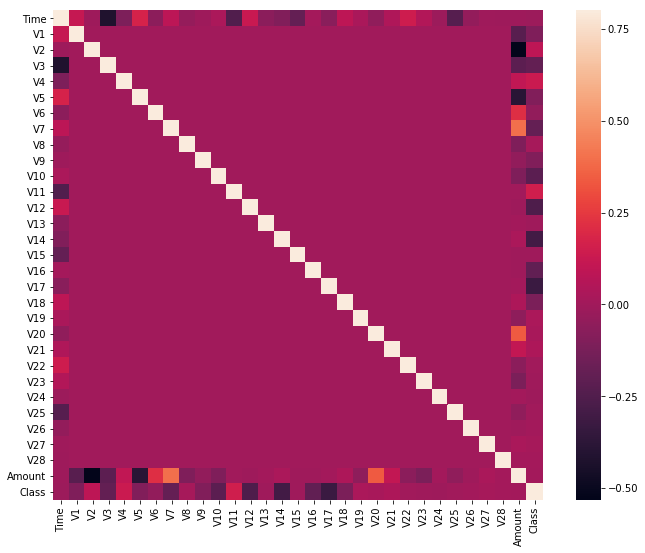

In [25]:

# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# 3.Feature selection

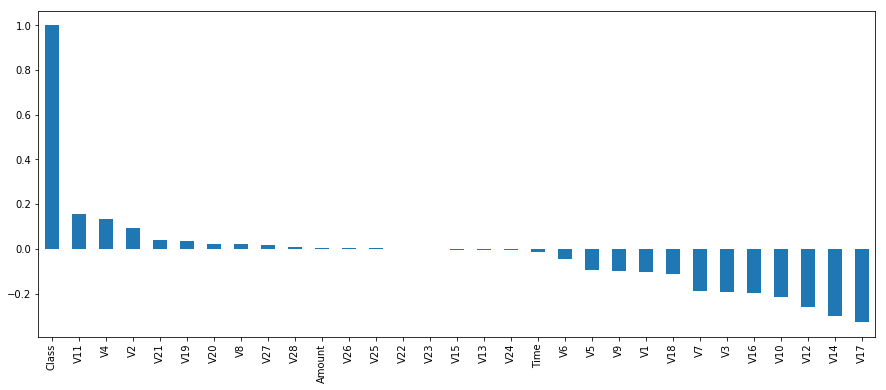

In [24]:
plt.figure(figsize=(15,6))
dataset.corr()['Class'].sort_values(ascending=False).plot.bar()

In [16]:
# Delection irrelevant variables

var_del = [ 'V28','V26','V25','V22','V23','V15','V13','V24']
dataset.drop(var_del,axis = 1, inplace= True)

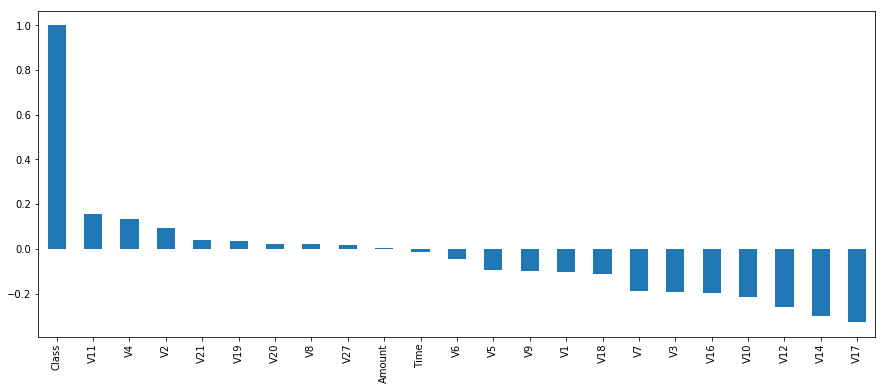

In [20]:
# visualisation of the remaining variables
plt.figure(figsize=(15,6))
dataset.corr()['Class'].sort_values(ascending=False).plot.bar()

In [26]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V16,V17,V18,V19,V20,V21,V27,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-1.491363e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,3.332112e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,9.585956e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,4.036325e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.921433e+01,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-2.256568e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-4.255740e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-7.083953e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,5.060132e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,1.342146e-03,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,4.931498e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,9.104512e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.052677e+01,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,3.161220e+01,25691.160000,1.000000


In [17]:
# Due to the volume of the dataset, we focus only on 10% of the sample to minimise the cost of time in training our modoel
dataset = dataset.sample(frac =0.1, random_state =1)
print(dataset.shape)

(28481, 23)


# 4.Model Training and Result

In [18]:
x = dataset.drop('Class',axis=1)
y = dataset['Class']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

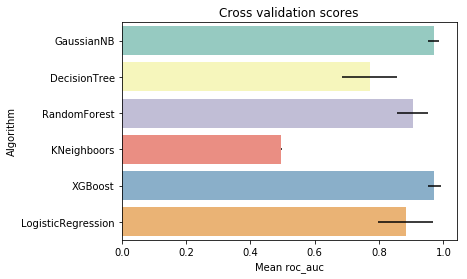

In [41]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["GaussianNB","DecisionTree",
"RandomForest","KNeighboors","XGBoost","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")

In [ ]:
# GaussianNB and XGBoost model perform better to other selected models

# 5. Tuning the hyper-parameter estimators


To improve on each of this model, I applied the Tuning hyperparameter estimators. The method extracts the best model parameters  for each learning algorithm. For instance, different models have different parameters that cannot be directly estimated from the model.  For example, the k  in k-nearest neighbours, the C and sigma hyperparameters for support vector machines.

In most cases, researchers do not directly have control over this value. The values are chosen, and there is no analytical formula available to calculate the values. The importance of this test is to instruct the machine to explore the best possible value for selection. The process of choosing the right set of values is typically known as “Hyperparameter optimisation” or “Hyperparameter tuning”. There are two types of hyperparameter optimisations (Grid search and Random search). In this project, I considered on only Grid search method.


# XGboost

In [26]:

xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.025, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.25, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [27]:

xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9514303214686582
Best parameters set: 
 {'learning_rate': 0.025, 'max_depth': 4, 'subsample': 1.0}


In [28]:

y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

In [16]:

# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

# KNeighborsClassifier

In [29]:

knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)classifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 8, 16], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [30]:

knn_best = grid_knn.best_estimator_
# Best score
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.49698792198469655
Best parameters set: 
 {'n_neighbors': 4, 'weights': 'uniform'}


In [31]:

y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

# Logistic Regression


In [32]:


lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.001  , 0.00107, ..., 0.93325, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [33]:

lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.9596718442393101
Best parameters set: 
 {'C': 0.19054607179632485, 'penalty': 'l1'}


In [34]:

y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

# Random Forest 

In [36]:

rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(2, 7), 'min_samples_split': range(4, 10), 'min_samples_leaf': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [37]:

rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9486359870550903
Best parameters set: 
 {'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [38]:

y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

# Naive bayes gaussian

In [56]:

nb = GaussianNB()

nb_param_grid = {
   

}
grid_nb = GridSearchCV(nb, param_grid = nb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_nb.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=4, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [50]:


nb_best = grid_nb.best_estimator_
# Best score
print('Best Score:', grid_nb.best_score_)
print('Best parameters set: \n', grid_nb.best_params_)

Best Score: 0.9696816407127336
Best parameters set: 
 {}


In [57]:

y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:,1]

# Comparing the selected tuning models

In [58]:
"""
print_grid_search_metrics(grid_nb)
print_grid_search_metrics(grid_rf)
print_grid_search_metrics(grid_knn)
print_grid_search_metrics(grid_lr)
print_grid_search_metrics(grid_xgb)
"""

'\nprint_grid_search_metrics(grid_nb)\nprint_grid_search_metrics(grid_rf)\nprint_grid_search_metrics(grid_gb)\nprint_grid_search_metrics(grid_knn)\nprint_grid_search_metrics(grid_lr)\nprint_grid_search_metrics(grid_xgb)\n'

# 6. Plot learning curves to check for the overfitting 


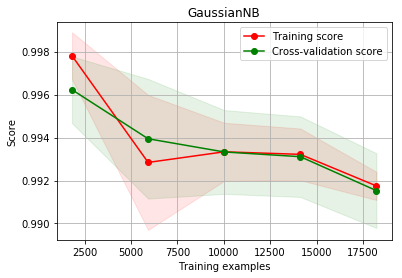

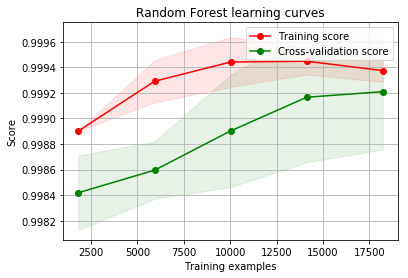

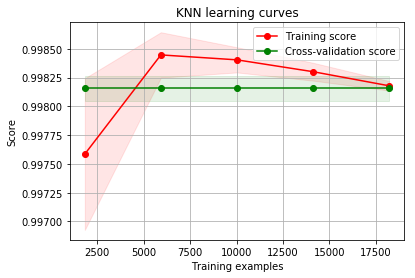

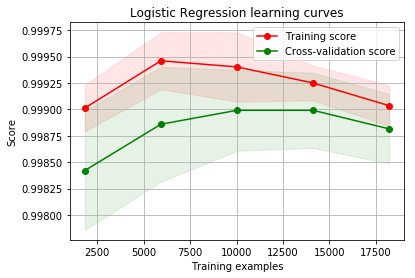

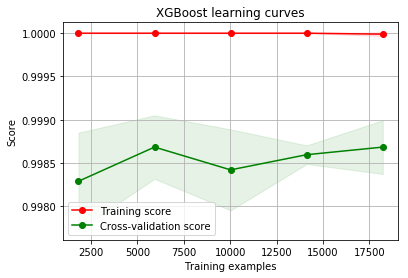

In [59]:

#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_nb.best_estimator_,"GaussianNB",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

For each of the graph, I noticed that the training score and the cross-validation score tend to move together except for XGBoost learning curve where the training score and cross-validation score are far apart. 

For all graphs (except XGBoost learning),  I noticed that both cross-validation and training score reached a maximum value with an increasing training sample before the curves start diminishing. 

In contrast, the XG Boost training score remains very high at a constant rate from the beginning to the end, although, this value remains under the maximum. The consequence is that the validation score for XGBoost could be increased as the training sample increased to cause overfitting.





# Calculate Confusion Matrix (Precision, Recall, Accuracy)

 The confusion matrix tells how the tuples in training and testing models are correctly classified. The models are evaluated based on parameters such as precession, recall, accuracy and F1 score.
 
 The precession is the  proportion of the predicted non fraudulent transactions that are actually predicted as good and the recall is the proportion of  actual non fraudulent transaction that are correctly recall as good.

In [69]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['valid','fraud']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
GaussianNB
Accuracy is 0.9926276987888363
Precision is 0.07317073170731707
Recall is 0.42857142857142855
F1 score is 0.125
ROC AUC is 0.9068039166457444


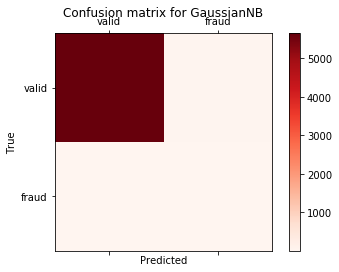

Logisitic Regression
Accuracy is 0.9989468141126909
Precision is 0.6
Recall is 0.42857142857142855
F1 score is 0.5
ROC AUC is 0.9811448656791364


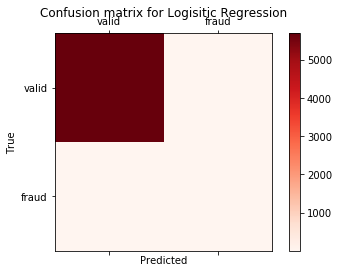

K-Nearest-Neighbors
Accuracy is 0.9987712831314727
Precision is nan
Recall is 0.0
F1 score is nan
ROC AUC is 0.4978031634446397


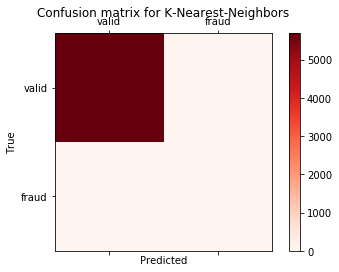

Random Forest
Accuracy is 0.9991223450939091
Precision is 0.6666666666666666
Recall is 0.5714285714285714
F1 score is 0.6153846153846153
ROC AUC is 0.8529500376600554


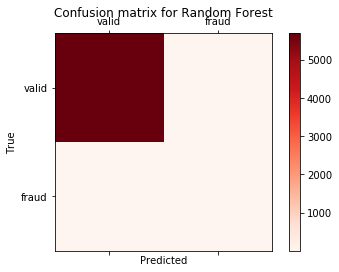

XGBoost Classifier
Accuracy is 0.9987712831314727
Precision is 0.5
Recall is 0.42857142857142855
F1 score is 0.4615384615384615
ROC AUC is 0.8459076073311576


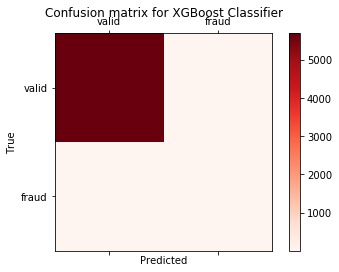

In [70]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("GaussianNB", confusion_matrix(y_test, y_pred_nb), roc_auc_score(y_test, y_prob_nb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

# 7. Comparing all selected tuning models with heatmap

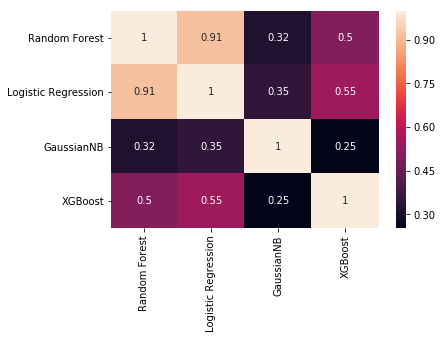

In [65]:

# Concatenate all classifier results

test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_nb = pd.Series(nb_best.predict(X_test), name="GaussianNB")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")


ensemble_results = pd.concat([test_rf, test_lr,test_nb, test_xgb],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

The prediction appear to be similar for all selected models except when GussianNB model is compared to the others selected models. To estimate a better model, I will consider combined ensembling voting methods to combined all the selected model together. The voting method is useful when you are uncertain about the situation, uncertain about which method is most accurate, and when you want to avoid large errors.

#  Combined voting esembling 

In [ ]:
# I considered the soft voting paramter.

votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('nb', nb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [67]:

y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Ensemble modeling
Accuracy is 0.9989468141126909
Precision is 0.6
Recall is 0.42857142857142855
F1 score is 0.5
ROC AUC is 0.9721817725332664


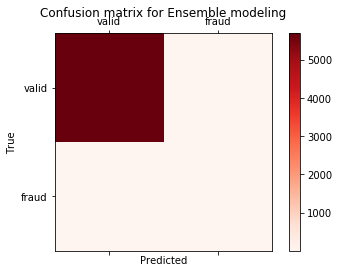

In [71]:

confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

The AUROC score of 0.97 is smaller than the logistic regression score of 0.98. Therefore, I will combined both voting and logistic regression for final prediction.

# ROC curve  

Since we aim to predict fraud cases, I would maximise recall value to near 1.0 to find all the relevant fraud cases within the dataset. For the recall to be equal to 1, I would need to label all transaction as fraud cases; the consequence is that the bank will block all the registered account, and the model will technically suffer from wronged classification (low precision). To minimise the trade-off between precision and recall, I set the threshold value around 0.5 to achieve a balance between the precision and recall value and calculate the area under the Curve (AUC).




# The ROC curve for combined voting

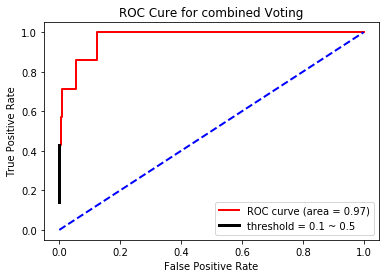

In [94]:

# make the ROC curve

fpr, tpr, thresh = roc_curve(y_test, y_prob_voting, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_voting)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh >= 0.5) & (thresh >= 0.5)] 
x2 = tpr[(thresh >= 0.5) & (thresh >= 0.5)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Cure for combined Voting')
plt.legend(loc="lower right")
plt.show()

# The relationship between Recall and Precision

In [89]:

acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob_voting >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob_voting >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob_voting >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob_voting >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

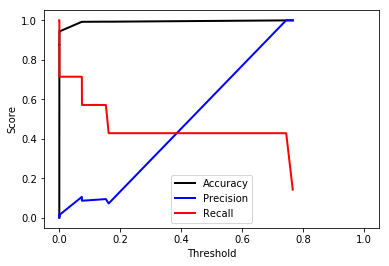

In [90]:

fig = plt.figure()
plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower center")
plt.show()

# The ROC curve for Logistic Regression


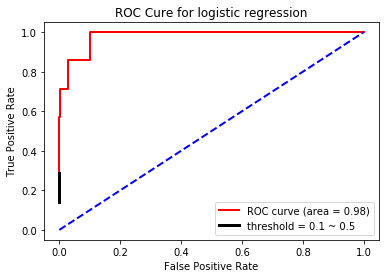

In [96]:
# make the ROC curve

fpr, tpr, thresh = roc_curve(y_test, y_prob_lr, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_lr)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh >= 0.5) & (thresh >= 0.5)] 
x2 = tpr[(thresh >= 0.5) & (thresh >= 0.5)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Cure for logistic regression')
plt.legend(loc="lower right")
plt.show()

# 8.Conclusion


This project addressed the credit card fraud detection using classification machine learning algorithms that include Logistic Regression, Kneighbours, Gaussian Naive Bayesian, Decision Tree and Random Forest. Further, I incorporated the tuning estimator for each of the selected models and compared the performance of each model to the combined voting model. Finally,  when the project accounts for the true and false positive and negative predicted outcomes.; the accurate prediction of logistic regression and combined voting are similar. The best ROC curve score achieved is 98% and 97% for logistic regression and combined voting respectively.This result implies that logistic regression and combined voting are the preferred strategies to predict credit card fraud.

# 9. References


Noghani, F and Moattar, H. (2017),"Ensemble Classification and Extended Feature Selection for Credit Card Fraud Detection", Journal of AI and Data Mining  Vol 5, No 2, 2017, 235-243.

Mahmondi, N and Duman E(2015), "Detecting credit card fraud by modified fisher discriminant analysis"; Expert with the applications 42(2015) 2510 -2515.

Patil S* and  Soni V (2018), "Predictive Modelling For Credit Card Fraud Detection Using Data Analytics";Procedia Computer Science 132 (2018) 385–395.
 
Research and Market(2018), "Global Fraud Detection and Prevention Market - Segmented by Solution, Fraud, Scale of End User, End User and Region - Growth, Trends and Forecast (2018 - 2023)" Available at: https://www.researchandmarkets.com/reports/4602386/global-fraud-detection-and-prevention-market (Accessed: 10 April 2019)
 
Yanxia Li - User_Churn_Predictions Available at:https://github.com/yanxiali/User_Churn_Predictions/blob/master/User_Churn_Prediction.ipynb
